# AI-Generated Text Detection

## Project Abstract

This project aims to develop a machine learning model capable of distinguishing between human-written and AI-generated text. The model leverages natural language processing (NLP) techniques and a Long Short-Term Memory (LSTM) neural network to analyze and classify text data. The project includes both training and testing phases, with the model being trained on a labeled dataset and then evaluated for its performance.

## Project Description

The project is divided into two main phases:

1. **Training and Saving Phase**:
    - **Data Preparation**: Text data is preprocessed to remove noise and stopwords.
    - **Model Building**: An LSTM model is constructed to learn patterns in the text data.
    - **Training**: The model is trained on a dataset of labeled text samples.
    - **Saving**: The trained model and tokenizer are saved for future use.

2. **Loading and Testing Phase**:
    - **Model Loading**: The saved model and tokenizer are loaded.
    - **Prediction**: The model is used to classify new text inputs as either human-written or AI-generated.

## Interactive Info

To interact with the model, follow these steps:

1. **Training the Model**:
    - Ensure you have the necessary libraries installed: `tensorflow`, `nltk`, `pandas`, `scikit-learn`.
    - Prepare your training data and initialize the `AIDetectionModel` class.
    - Train the model using the `train_model` method and save the model and tokenizer.

2. **Testing the Model**:
    - Load the saved model and tokenizer.
    - Use the `predict` method of the `AIDetectionModel` class to classify new text inputs.
    - Enter text inputs interactively to see the model's predictions.

This project provides a comprehensive approach to detecting AI-generated text, making it a valuable tool for various applications, including content verification and authenticity checks.
### Model Details

The model used in this project is a Long Short-Term Memory (LSTM) neural network. LSTM is a type of recurrent neural network (RNN) that is well-suited for sequence prediction problems because it can learn and remember long-term dependencies in data. This makes it ideal for natural language processing tasks, such as text classification.

### Dataset

The dataset used for training the model consists of text samples labeled as either human-written or AI-generated. The text data is preprocessed to remove noise and stopwords, and then tokenized and padded to ensure uniform input length for the LSTM model.

### Model Description

The LSTM model architecture includes the following layers:
- **Embedding Layer**: Converts input text sequences into dense vectors of fixed size.
- **LSTM Layers**: Two LSTM layers with 256 and 128 units, respectively, to capture temporal dependencies in the text data.
- **Dropout Layers**: Added after each LSTM layer to prevent overfitting by randomly setting a fraction of input units to 0 during training.
- **Dense Layers**: Fully connected layers with ReLU activation for intermediate processing and sigmoid activation for the final output to classify the text as human-written or AI-generated.

### Why LSTM?

LSTM networks are chosen for this project because they are capable of learning long-term dependencies and patterns in sequential data, which is essential for understanding and classifying text. Their ability to retain information over long sequences makes them particularly effective for natural language processing tasks.

### Training and Evaluation

The model is trained on a labeled dataset, with 80% of the data used for training and 20% for validation. The training process involves optimizing the model's weights to minimize binary cross-entropy loss, and the model's performance is evaluated based on accuracy.

Training and Saving Phase

In [3]:
%pip install tensorflow nltk pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import pickle

nltk.download('stopwords')

class AIDetectionModel:
    def __init__(self, max_words=5000, max_len=500):
        self.max_words = max_words
        self.max_len = max_len
        self.tokenizer = None
        self.model = None

    def preprocess_text(self, text):
        if not isinstance(text, str):
            return ""
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)

    def prepare_data(self, texts):
        processed_texts = [self.preprocess_text(text) for text in texts]
        
        # Only fit tokenizer during training
        if self.tokenizer is None:
            self.tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=self.max_words, oov_token="<OOV>")
            self.tokenizer.fit_on_texts(processed_texts)
            
        sequences = self.tokenizer.texts_to_sequences(processed_texts)
        X = pad_sequences(sequences, maxlen=self.max_len)
        return X

    def build_lstm_model(self):
        model = Sequential([
            Embedding(self.max_words, 128, input_length=self.max_len),
            LSTM(256, return_sequences=True),
            Dropout(0.3),
            LSTM(128),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def train_model(self, X_train, y_train, X_val, y_val):
        self.model = self.build_lstm_model()
        history = self.model.fit(
            X_train, y_train,
            epochs=2,
            batch_size=32,
            validation_data=(X_val, y_val),
            verbose=1
        )
        return history

    def save_model(self, filepath):
        self.model.save(filepath)

# Load and prepare training data
train_data = pd.read_csv("C:/Users/arun1/Downloads/train.csv")
train_texts = train_data['text'].fillna("")
train_labels = train_data['generated']

# Initialize model and prepare training data
ai_detector = AIDetectionModel()
X_train = ai_detector.prepare_data(train_texts)
y_train = np.array(train_labels)

# Split into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Train the model
history = ai_detector.train_model(X_train_split, y_train_split, X_val_split, y_val_split)

# Save the model and tokenizer
ai_detector.save_model("ai_detection_model.h5")
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(ai_detector.tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arun1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\arun1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/2
8527/8527 ━━━━━━━━━━━━━━━━━━━━ 7322s 858ms/step - accuracy: 0.9669 - loss: 0.1009 - val_accuracy: 0.9911 - val_loss: 0.0336
Epoch 2/2
8527/8527 ━━━━━━━━━━━━━━━━━━━━ 6659s 781ms/step - accuracy: 0.9928 - loss: 0.0221 - val_accuracy: 0.9972 - val_loss: 0.0084


Loading and Testing Phase

In [7]:
# Import necessary libraries
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from nltk.corpus import stopwords
import nltk
import pickle

nltk.download('stopwords')

class AIDetectionModel:
    def __init__(self, max_words=5000, max_len=500):
        self.max_words = max_words
        self.max_len = max_len
        self.tokenizer = None
        self.model = None

    def preprocess_text(self, text):
        if not isinstance(text, str):
            return ""
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)

    def prepare_data(self, texts):
        processed_texts = [self.preprocess_text(text) for text in texts]
        
        # Only fit tokenizer during training
        if self.tokenizer is None:
            self.tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=self.max_words, oov_token="<OOV>")
            self.tokenizer.fit_on_texts(processed_texts)
            
        sequences = self.tokenizer.texts_to_sequences(processed_texts)
        X = pad_sequences(sequences, maxlen=self.max_len)
        return X

    def predict(self, text, verbose=0):
        processed_text = self.preprocess_text(text)
        sequence = self.tokenizer.texts_to_sequences([processed_text])
        padded_sequence = pad_sequences(sequence, maxlen=self.max_len)
        try:
            with tf.device('/CPU:0'):  # Use CPU for single predictions
                prediction = self.model.predict(padded_sequence, batch_size=1, verbose=verbose)
        except Exception as e:
            print(f"Error during prediction: {e}")
            return "Error"
        return "AI-generated" if prediction[0][0] > 0.1 else "Human-written"

# Initialize the model
ai_detector = AIDetectionModel()

# Load the saved model
ai_detector.model = load_model("ai_detection_model.h5")

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    ai_detector.tokenizer = pickle.load(handle)

# Custom input testing
print("\nModel is ready for predictions...")
try:
    while True:
        test_text = input("Enter a text to classify (or 'quit' to exit): ")
        if test_text.lower() == 'quit':
            print("Exiting...")
            break
        result = ai_detector.predict(test_text)
        print(f"Prediction: {result}")
except KeyboardInterrupt:
    print("\nProgram terminated by user.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arun1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Model is ready for predictions...
Prediction: AI-generated
Prediction: AI-generated
Prediction: AI-generated
Prediction: Human-written
Prediction: Human-written
Prediction: AI-generated
Prediction: AI-generated
Prediction: AI-generated
Prediction: AI-generated
Prediction: AI-generated
Prediction: AI-generated
Prediction: AI-generated
Prediction: AI-generated
Prediction: Human-written
Prediction: AI-generated
Prediction: Human-written
Prediction: AI-generated
Prediction: AI-generated
Prediction: AI-generated
Prediction: AI-generated
Prediction: AI-generated
Prediction: AI-generated
Prediction: AI-generated
Prediction: Human-written
Prediction: Human-written
Prediction: AI-generated
Prediction: Human-written
Exiting...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arun1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2706/2706 ━━━━━━━━━━━━━━━━━━━━ 648s 239ms/step
   Id                                               text      predicted
0   1  The Face on Mars is nothing but a natural occu...  Human-written
1   2  Students have a higher chance of catching a vi...  Human-written
2   3  Driverless cars have good and bad things that ...  Human-written
3   4  Some people might think that traveling in a gr...   AI-generated
4   5  How many of us students want to be forced to d...  Human-written
Confusion Matrix:
[[30644     0]
 [    0 55943]]


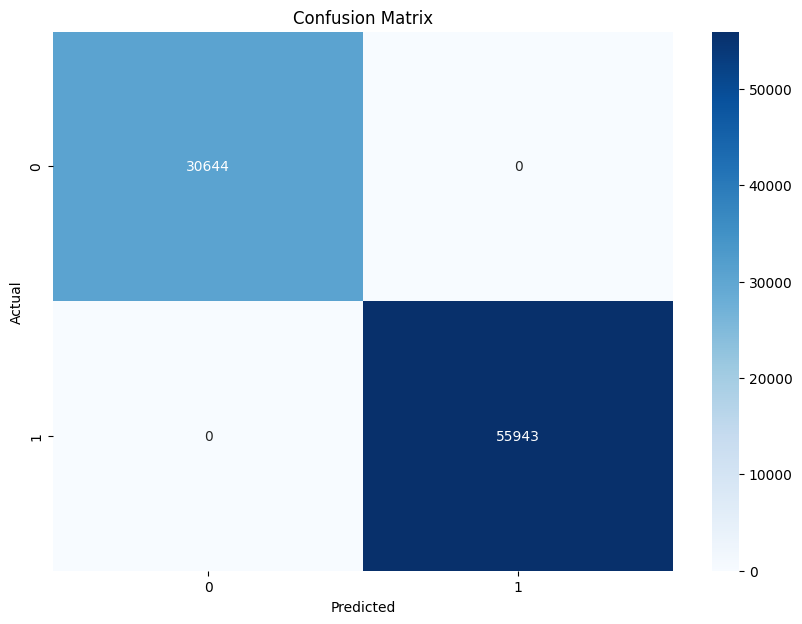

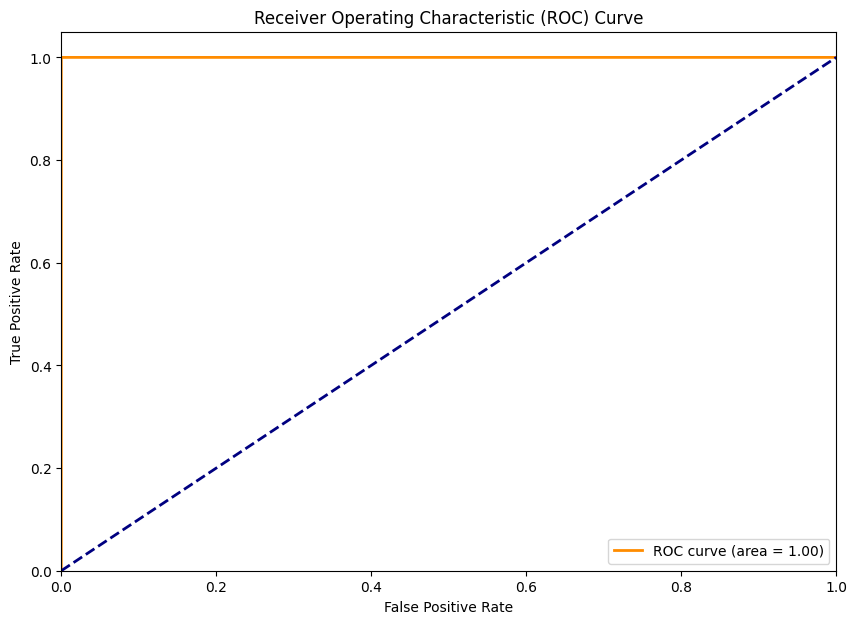

Prediction Accuracy: 1.00


In [10]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
import nltk
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')

class AIDetectionModel:
    def __init__(self, max_words=5000, max_len=500):
        self.max_words = max_words
        self.max_len = max_len
        self.tokenizer = None
        self.model = None

    def preprocess_text(self, text):
        if not isinstance(text, str):
            return ""
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)

    def prepare_data(self, texts):
        processed_texts = [self.preprocess_text(text) for text in texts]
        sequences = self.tokenizer.texts_to_sequences(processed_texts)
        X = pad_sequences(sequences, maxlen=self.max_len)
        return X

    def predict(self, text, verbose=0):
        processed_text = self.preprocess_text(text)
        sequence = self.tokenizer.texts_to_sequences([processed_text])
        padded_sequence = pad_sequences(sequence, maxlen=self.max_len)
        try:
            with tf.device('/CPU:0'):  # Use CPU for single predictions
                prediction = self.model.predict(padded_sequence, batch_size=1, verbose=verbose)
        except Exception as e:
            print(f"Error during prediction: {e}")
            return "Error"
        return "AI-generated" if prediction[0][0] > 0.1 else "Human-written"

# Initialize the model
ai_detector = AIDetectionModel()

# Load the saved model
ai_detector.model = load_model("ai_detection_model.h5")

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    ai_detector.tokenizer = pickle.load(handle)

# Load and prepare test data
test_data = pd.read_csv("C:/Users/arun1/Downloads/test.csv")
test_texts = test_data['text'].fillna("")
y_test = test_data['Id']  # Assuming 'generated' column contains true labels

# Prepare test data
X_test = ai_detector.prepare_data(test_texts)

# Predict on test data
predictions = ai_detector.model.predict(X_test)

# Convert predictions to labels
predicted_labels = ["AI-generated" if pred > 0.5 else "Human-written" for pred in predictions.flatten()]

# Add predictions to the test data
test_data['predicted'] = predicted_labels

# Display the first few rows of the test data with predictions
print(test_data.head())

# Generate confusion matrix
conf_matrix = confusion_matrix(test_data['predicted'], predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Convert y_test to numerical labels for ROC curve computation
# Assuming 'generated' column contains true labels
y_test_numerical = test_data['predicted'].map({"Human-written": 0, "AI-generated": 1})

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_numerical, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate prediction accuracy
accuracy = accuracy_score(test_data['predicted'], predicted_labels)
print(f'Prediction Accuracy: {accuracy:.2f}')

### Conclusion

This project demonstrates the effectiveness of LSTM networks in distinguishing between human-written and AI-generated text. The trained model can be used for various applications, including content verification and authenticity checks, providing a valuable tool for detecting AI-generated text.